# KNN Classification Analysis

Aaron Balke

December 18th, 2023

# Part I: Research Question

## Question

For this analysis, my research question is "Which conditions and patient demographics are correlated with High Blood Pressure Patients?".
Our healthcare system can greatly benefit from knowing which aspects of a client's health can lead to high blood pressure and generalized heart complications since these are associated with 26% of all United States deaths. (CDC)

This question will be analyzed using K-nearest neighbor classification.

## Goals

The goal of this analysis is to create an accurate and effective KNN Classification Model for answering which features are correlated to High Blood pressure. The goal is to have a model more effective than my previous Logistic Regression Model (80% accuracy). A model of this accuracy or greater would allow us to be more confident in making estimates, and health changes and wellness suggestions to patients.

# Part II: Method Justification

## Justification

When a new data point with an unknown label is added to a K-Nearest Neighbor model, the (k amount of) points surrounding the new point are examined. The most frequent label of these surrounding points is predicted as the new data point label.   

## Assumption

The main assumption of KNN Classification is that "The closer two given points are to each other, the more related and similar they are"(Hachcham). This makes it a very simple and powerful model, however, it is sensitive to the inclusion of insignificant features. (Nelson)

## Packages and Libraries

Standard Libraries:
1. Python: I will be using Python as my programming language since it is a straightforward language, has strong data analysis support, and is the language I am most familiar with.
2. Jupyter Notebook: I will be running Python in a Juypter Notebook environment since Jupyter provides checkpoint functionality. This means data will not need to be loaded runtime, but rather its state is stored for later use.
3. Pandas: The Pandas package provides useful data science structures to Python in the form of DataFrames. Dataframes allow for easier manipulation of larger datasets. This is much easier than the standard list/arrays provided by Python.
3. Numpy: The Numpy package provides to this situation efficient scientific computing, and NaN values to simplify data completeness operations.
4. Seaborn & Matplotlib: The Seaborn & Matplotlib packages will provide tools to help visualize the dataset and deliverables these will help with validation and reporting.
5. Sklearn: Provides StandardScaler for scaling continuous variables, train_test_split method to help evaluate model, metrics to evaluate model, KNN Model Object for analysis, and GridSearchCV for automatic assessment of many model hyperparams.

# Part III: Data Preparation

## Data Preprocessing Goal

One major goal of the preprocessing step will be to scale the Independent Variables. It will be important to have continuous variables scaled to avoid high-magnitude variables overwhelming the analysis. Since KNN Classification is a distance-based analysis the unscaled data can be heavily warped (Sharma).

## Chosen Variables

| Feature | Type |
|:---------|:--------|
|  Age  | Numeric |
|  Income  | Numeric |
|  Marital  | Categorical |
|  Gender  | Categorical |
|  ReAdmis  | Categorical |
|  VitD_levels  | Numeric |
|  Doc_visits  | Numeric |
|  Full_meals_eaten  | Numeric |
|  VitD_supp  | Numeric |
|  Soft_drink  | Categorical |
|  Stroke  | Categorical |
|  Complication_risk  | Categorical |
|  Overweight  | Categorical |
|  Arthritis  | Categorical |
|  Diabetes  | Categorical |
|  Hyperlipidemia  | Categorical |
|  BackPain  | Categorical |
|  Anxiety  | Categorical |
|  Allergic_rhinitis  | Categorical |
|  Reflux_esophagitis  | Categorical |
|  Asthma  | Categorical |
|  Initial_days  | Numeric |

## Data Preparation
1. Remove Duplicates, Null Values, and unused Features: These values either make analysis impossible or make analysis less accurate, and less efficient.
2. Convert Object Data into Categorical and Create Dummy Variables: Fixes problems associated with categorical variables and fixes multicollinearity.
3. Convert Boolean Data into Integers: We Require Numerical representations.
4. Scale Continuous Variables: We want to scale continuous independent variables, see the above data preprocessing goal of KNN classifications.

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Import Data
df = pd.read_csv('../medical_clean.csv', index_col=0)

In [2]:
# Get Shape of new dataframe of only duplicate values
df[df.duplicated()].shape

(0, 49)

In [3]:
# Aggregate NaN Values, filter aggregates > 0, returns # records with NaN values
nullity = df.isna().sum()
nullity[~(nullity == 0)].shape

(0,)

In [4]:
# Remove Unused Features
df.drop(
    columns = ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
               'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Initial_admin', 'Services',
               'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
               'Item6', 'Item7', 'Item8'
              ],
    inplace=True
)

In [5]:
# Convert Categorical
var_cat = ['Marital', 'Gender', 'Complication_risk']

for var in var_cat:
    df[var] = df[var].astype("category")

# Convert Boolean
var_bool = ['ReAdmis', 'Soft_drink', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
            'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
            'Asthma']

for var in var_bool:
    df[var] = df[var].replace({
        "Yes": 1,
        "No": 0
    })
    
df['HighBlood'] = df['HighBlood'].replace({
    "Yes": 1,
    "No": 0
})

var_numeric = ['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days']

# Convert String Categorical into Separate Boolean Features (Dummy Variables)

var_cat_dumm = []

for var in var_cat:
    dummies = pd.get_dummies(df[var], prefix=var, drop_first=True).astype(np.int64)
    df.drop(var, axis=1, inplace=True)
    df = pd.concat([df, dummies], axis="columns")
    var_cat_dumm.extend(dummies.columns)
    
# Combine Names of all independent variables into 1 list
var_independent = var_numeric + var_bool + var_cat_dumm

In [6]:
# Scale Continuous Features to a scale between 0 - 1
scaler = MinMaxScaler()
df[var_numeric] = scaler.fit_transform(df[var_numeric])

## Exported Dataset

In [1]:
# Save independent and dependent variables in separate CSVs
df.to_csv('./clean.csv', index=False)

NameError: name 'df' is not defined

# Part IV: Analysis
## Data Splitting

In [8]:
# Split Variables
y = df['HighBlood'].copy()
X = df.drop(columns=['HighBlood'], axis=1).copy()

# Split Data and Export CSVs for each Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)

X_train.to_csv('./d209_task1_X_train.csv', index=False)
X_test.to_csv('./d209_task1_X_test.csv', index=False)
y_train.to_csv('./d209_task1_y_train.csv', index=False)
y_test.to_csv('./d209_task1_y_test.csv', index=False)

## Analysis Technique

To perform the KNN classification the following steps must take place:
1. Choose the correct # of K-neighbors. This is achieved by running multiple KNN models with different K values, the one that scores the highest will be used. GrisSearchCV will automate this process. GridSearchCV uses K-Fold Cross Validation to split the inputted data into training and test splits, for scoring. It will iterate over the data until each group of data has been used for testing, (in our case this is the default 5 times / 5 groups) and the average of the scores. (Beheshti)
2. A new KNN Object will be created with the optimal K-neighbors, and the training data will be fitted. Once fitted, the test data will be predicted to return predicted values.

## Classification Analysis

In [9]:
# Auotmatic Process to get the optimal K-Neighbors Amount (Source: Datacamp)

params = {
    'n_neighbors': np.arange(1,10)
}

knn = KNeighborsClassifier()

# Default CV Value is 5
knn_cv = GridSearchCV(knn, params).fit(X_train, y_train)

print(f"Best Params:\t{knn_cv.best_params_}")
print(f"Best Score:\t{knn_cv.best_score_}")

Best Params:	{'n_neighbors': 2}
Best Score:	0.565625


In [10]:
# Create Optimal Model, fit training data and predict on test data
knn = KNeighborsClassifier(
    n_neighbors=knn_cv.best_params_['n_neighbors']
)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Part V: Data Summary and Implications
## Evaluation of Accuracy

To evaluate the accuracy of the model we will create a confusion matrix to directly compare the test and predicted data. Then we will use the Area Under the Curve (AUC) visualization to evaluate the model's ability to separate the distributions of High Blood Pressure and No High Blood Pressure.

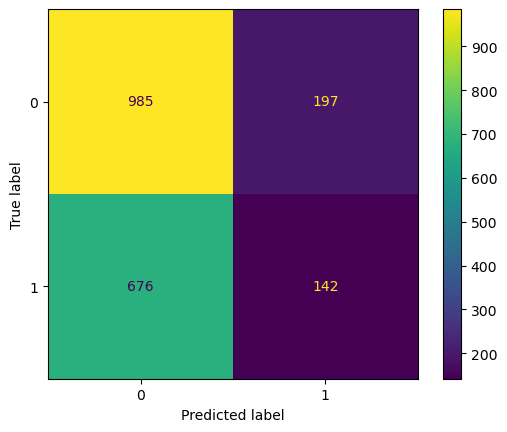

Accuracy: 0.56
Precision: 0.42
Sensitivity (Recall): 0.17
Specificity: 0.83
F-score: 0.25


In [11]:
# Confusion Matrix Visualization
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# All Confusion Matrix Metrics
print(f'Accuracy: {round(metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(metrics.precision_score(y_test, y_pred),2)}')
print(f'Sensitivity (Recall): {round(metrics.recall_score(y_test, y_pred),2)}')
print(f'Specificity: {round(metrics.recall_score(y_test, y_pred, pos_label=0),2)}')
print(f'F-score: {round(metrics.f1_score(y_test, y_pred),2)}')

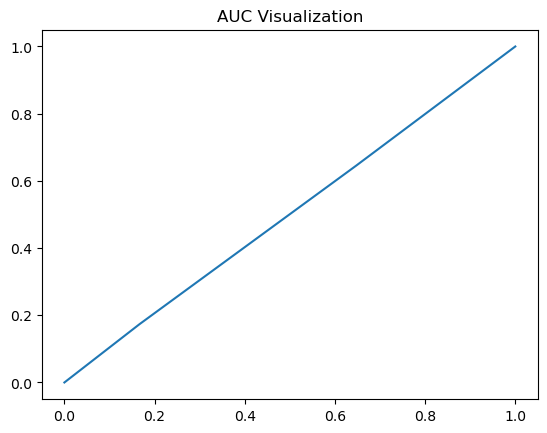

AUC:  0.5015203604185025


In [12]:
# Area-Under-Curve Visualization (Datacamp)
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title("AUC Visualization")
plt.show()

# Area-Under-Curve Metric
auc = metrics.auc(fpr, tpr)
print("AUC: ", auc)

From our evaluation visualization and metrics, we can interpret our model as, really really bad. The area Under the Curve (AUC) visualization provides shows that our model can not separate the group's High Blood Pressure and No High Blood Pressure at all, The worst situation would be an AUC Value of 0.5, and ours is sitting at 0.501. The model cannot distinguish the two groups at all and makes false positive and false negative predictions consistently. The model assumes no high blood pressure far too often. This is clear from our confusion matrix, which shows it only predicted high blood pressure for 339/2000 records. I believe our confusion matrix accuracy of ~56% is due to guessing no high blood pressure constantly and sometimes being correct - "A broken clock is right twice a day".

## Results and Implications

This model performs effectively and is as good as randomly guessing and cannot make accurate predictions on patients' high blood pressure. Our goal was to create a model more accurate than our Logistic Regression model with an accuracy of 80%, and this KNN Classification model cannot beat my previous Logistic Regression Model.

## Limitation

I believe the use of categorical/binary variables affects this analysis greatly. Since KNN classification is a distance analysis, using variables such as high blood pressure, or overweight as "Yes" or "No" (0 or 1) instead of continuous variables removes a lot of nuance to the analysis. In my opinion, even with data Standardized, forcing a slightly overweight patient and a morbidly obese patient to have the same value in distance analysis would alter the effectiveness of the model.

## Recommendation

At this time my recommendation is to continue using my more accurate Logistic Regression Model and to not move forward with a KNN classification model for finding links between High Blood Pressure and other conditions/variables.

## Presentation

## Web Sources

Main Source was Datacamp Resources:

Hugo, B. (n.d.). Machine Learning with scikit-learn. Datacamp. from https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn

Elie, K. (n.d.). Machine Learning with Tree-Based Models in Python. Datacamp. from https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python

Kasey, J. (n.d.). Model Validation in Python. Datacamp. from https://app.datacamp.com/learn/courses/model-validation-in-python

Preprocessing & Modeling:

Beheshti, N. (2022, February 5). Cross Validation and Grid Search. Medium. https://towardsdatascience.com/cross-validation-and-grid-search-efa64b127c1b

Detecting Multicollinearity with VIF - Python. (2020, August 14). GeeksforGeeks. https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

How to scale Pandas DataFrame columns ? (2021, April 24). GeeksforGeeks. https://www.geeksforgeeks.org/how-to-scale-pandas-dataframe-columns

Khoong, W. H. (2023, January 21). Why Scaling Your Data Is Important. CodeX. https://medium.com/codex/why-scaling-your-data-is-important-1aff95ca97a2

sklearn.feature_selection.SelectKBest — scikit-learn 0.23.0 documentation. (n.d.). Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

scikit-learn . (2019). sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.22.1 documentation. Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

sklearn.metrics.ConfusionMatrixDisplay. (n.d.). Scikit-Learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

Evaluation:

KNN classification with categorical data. (n.d.). Stack Overflow. Retrieved December 16, 2023, from https://stackoverflow.com/questions/13625849/knn-classification-with-categorical-data

Narkhede, S. (2018, June 27). Understanding AUC - ROC Curve. Medium; Towards Data Science. https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

## Other Sources

Centers for Disease Control and Prevention. (2023, January 18). Leading Causes of Death. Centers for Disease Control and Prevention. https://www.cdc.gov/nchs/fastats/leading-causes-of-death.htm

Hachcham, A. (2021, July 12). The KNN Algorithm - Explanation, Opportunities, Limitations. Neptune.ai. https://neptune.ai/blog/knn-algorithm-explanation-opportunities-limitations

Nelson, D. (2020, February 23). What is a KNN (K-Nearest Neighbors)? Unite.AI. https://www.unite.ai/what-is-k-nearest-neighbors/

Sharma, P. (2019, August 25). Why is scaling required in KNN and K-Means? Medium. https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7